# APLIKASI LOGIKA FUZZY DALAM MENGOPTIMALKAN PRODUKSI MINYAK KELAPA SAWIT DI PT. WARU KALTIM PLANTATION MENGGUNAKAN METODE MAMDANI
## Nama : Dita marisa oktariano
## NIM : 09011381722113
## Kelas : SK5U
# Artificial Intelligence

Produksi minyak kelapa sawit penting untuk diperhatikan di PT. Waru Kaltim Plantation (WKP) untuk mendapatkan hasil produksi yang optimal. Oleh karena itu perlu dikembangkan sistem yang dapat untuk memprediksi jumlah minyak kelapa sawit yang harus diproduksi. Dalam penelitian ini, logika fuzzy yang mengimplementasikan fuzzy Mamdani digunakan untuk memprediksi jumlah  produksi minyak kelapa sawit berdasarkan data persediaan dan data permintaan. 

Sistem inferensi fuzzy Metode Mamdani dikenal juga dengan nama metode Max-Min. Metode Mamdani bekerja berdasarkan aturan aturan linguistik. Metode ini diperkenalkan oleh Ebrahim H. Mamdani pada tahun 1975.

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

### Adapun funsi-fungsi dari library yang dipakai adalah :
- import, berfungsi untuk multi file. Jadi kita dapat memanggil file lain dalam satu module yang berbeda.
- Numpy, berfungsi untuk operasi vektor dan matriks. Numpy digunakan untuk mengelola array multidemensi. Numpy merupakan salah satu library yang digunakan oleh library lain seperti Scikit-Learn untuk keperluan analisis data.
- Scikit-Fuzzy, merupakan kumpulan algoritma fuzzy logic yang dimasukkan untuk digunakan dalam SciPy Stack yang ditulis dalam bahasa Python.
- Matplotlib, berfungsi untuk memvisualisasikan data menjadi lebih indah dan rapi.

### Adapun Input dan Outpun yang digunakan :

#### Input : 
###### 1. Untuk Permintaan dibagi menjadi 3 bagian, yaitu:
- Permintaan Rendah ( kurang dari 1601 ton)
- Permintaan Sedang ( 1601- 6826 ton)
- Permintaan Tinggi ( lebih dari 6826 ton )

##### 2. Untuk Persedianan dibagi menjadi 3 bagian, yaitu:
- Persediaan Kurang ( kurang dari 368 ton)
- Persediaan Cukup ( 368 - 972 ton )
- Persediaan Banyak ( lebih dari 3127 )


#### Output :
##### Untuk Produksi dibagi menjadi 3 bagian, yaitu:
- Produksi Rendah ( kurang dari 1817 ton )
- Produksi Sedang ( 1817 - 6454 ton )
- Produksi Tinggi ( lebih dari 6454 ton)

# 1. Fuzzifikasi
Fuzzifikasi adalah Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)

## Fungsi Keanggotaan

### Untuk fungsi keanggotaan Permintaan dibagi menjadi 3,

#### - Permintaan rendah
$$ \mu permintaan\ rendah [x] = 
\begin{cases}
    0 & ; x \geq 3685 \\
    \frac{(3685-x)}{3685-1601} & ;1601 \leq x \leq\ 3685 \\
    1 & ; x \leq 1601
\end{cases}
$$


C:\Users\Win10\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


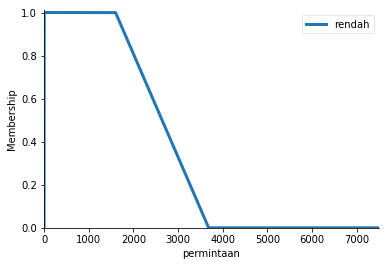

In [67]:
permintaan = ctrl.Antecedent(np.arange(0, 7500.5, 1), 'permintaan') #untuk menampilkan plotting
permintaan['rendah'] = fuzz.trapmf(permintaan.universe, [0, 1, 1601, 3685])
permintaan['rendah'].view()

plot diatas merupakan plot fungsi keanggotaan $\mu permintaan\ rendah(x) $

#### - Permintaan sedang
$$ \mu permintaan\ sedang [x] = 
\begin{cases}
    0 & ; x \leq 1601\ atau\ x \geq 6826 \\
    \frac{(x-1601)}{3685-1601} & ;1601 \leq x \leq\ 3685 \\
    \frac{(6826-x)}{6826-3685} & ;3685 \leq x \leq\ 6826 \\
    1 & ; x = 3685
\end{cases}
$$

C:\Users\Win10\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


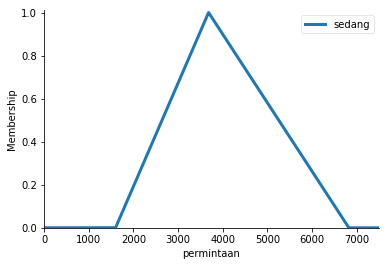

In [41]:
permintaan = ctrl.Antecedent(np.arange(0, 7500.5, 1), 'permintaan')
permintaan['sedang'] = fuzz.trimf(permintaan.universe, [1601, 3685, 6826])
permintaan['sedang'].view()

plot diatas yang merupakan plot fungsi keanggotaan $\mu permintaan\ sedang(x) $

#### - Permintaan tinggi
$$ \mu permintaan\ tinggi [x] = 
\begin{cases}
    0 & ; x \leq 3685 \\
    \frac{(x-3685)}{6826-3685} & ;3685 \leq x \leq\ 6826 \\
    1 & ; x \geq 6826
\end{cases}
$$


C:\Users\Win10\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


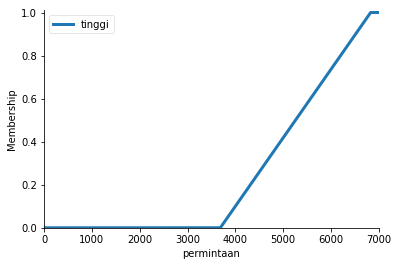

In [69]:
permintaan = ctrl.Antecedent(np.arange(0, 7000.5, 1), 'permintaan')
permintaan['tinggi'] = fuzz.trapmf(permintaan.universe, [3685, 6826, 7000, 7000])
permintaan['tinggi'].view()

plot diatas yang merupakan plot fungsi keanggotaan $\mu permintaan\ tinggi(x) $

###### Plotting ke empat fungsi keanggotaan Permintaan

C:\Users\Win10\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


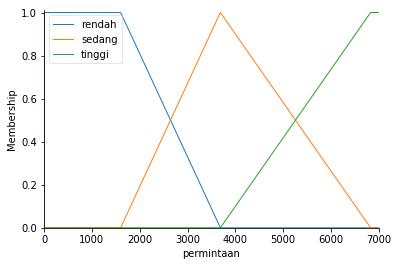

In [72]:
permintaan = ctrl.Antecedent(np.arange(0, 7000.5, 1), 'permintaan')
permintaan['rendah'] = fuzz.trapmf(permintaan.universe, [0, 1, 1601, 3685])
permintaan['sedang'] = fuzz.trimf(permintaan.universe, [1601, 3685, 6826])
permintaan['tinggi'] = fuzz.trapmf(permintaan.universe, [3686, 6825, 7000, 7000])
permintaan.view()

### Untuk fungsi keanggotaan Persediaan  dibagi menjadi 3,

#### - Persediaan kurang
$$ \mu persediaan\ kurang [y] = 
\begin{cases}
    0 & ; y \geq 972 \\
    \frac{(972-y)}{972-368} & ;368 \leq y \leq\ 972 \\
    1 & ; y \geq 368
\end{cases}
$$

C:\Users\Win10\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


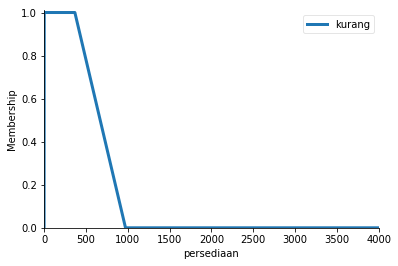

In [44]:
persediaan = ctrl.Antecedent(np.arange(0, 4000.5, 1), 'persediaan')
persediaan['kurang'] = fuzz.trapmf(persediaan.universe, [0, 1, 368, 972])
persediaan['kurang'].view()

plot diatas yang merupakan plot fungsi keanggotaan $\mu persediaan\ kurang(x) $

#### - Persediaan cukup
$$ \mu persediaan\ cukup [y] = 
\begin{cases}
    0 & ; y \leq 368\ atau\ y \geq 3127 \\
    \frac{(y-368)}{972-368} & ;368 \leq y \leq\ 972 \\
    \frac{(3127-y)}{3127-972} & ;972 \leq y \leq\ 3127 \\
    1 & ; y = 972
\end{cases}
$$

C:\Users\Win10\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


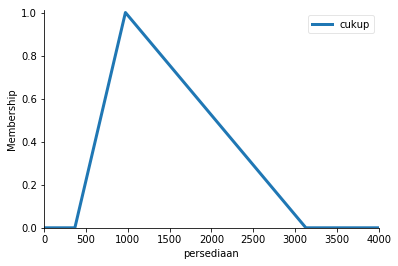

In [45]:
persediaan = ctrl.Antecedent(np.arange(0, 4000.5, 1), 'persediaan')
persediaan['cukup'] = fuzz.trimf(persediaan.universe, [368, 972, 3127])
persediaan['cukup'].view()

plot diatas yang merupakan plot fungsi keanggotaan $\mu persediaan\ cukup(x) $

#### - Persediaan banyak
$$ \mu persediaan\ banyak [y] = 
\begin{cases}
    0 & ; y \leq 972 \\
    \frac{(y-972)}{3127-972} & ;972 \leq y \leq\ 3127 \\
    1 & ; y \geq 3127
\end{cases}
$$

C:\Users\Win10\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


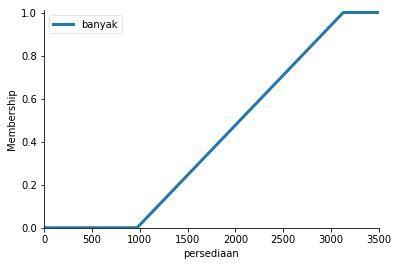

In [77]:
persediaan = ctrl.Antecedent(np.arange(0, 3500.5, 1), 'persediaan')
persediaan['banyak'] = fuzz.trapmf(persediaan.universe, [972, 3127, 3500, 3500]) 
persediaan['banyak'].view()

plot diatas yang merupakan plot fungsi keanggotaan $\mu persediaan\ banyak(x) $

###### Plotting ke empat fungsi keanggotaan Persediaan 

C:\Users\Win10\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


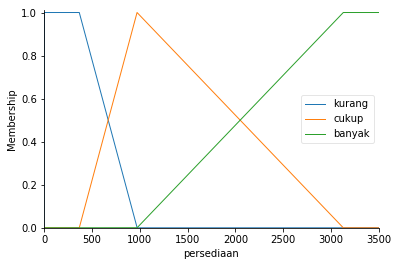

In [79]:
persediaan = ctrl.Antecedent(np.arange(0, 3500.5, 1), 'persediaan')
persediaan['kurang'] = fuzz.trapmf(persediaan.universe, [0, 1, 368, 972])
persediaan['cukup'] = fuzz.trimf(persediaan.universe, [368, 972, 3127])
persediaan['banyak'] = fuzz.trapmf(persediaan.universe, [972, 3127, 3500, 3500]) 
persediaan.view()

### Untuk fungsi keanggotaan Produksi dibagi menjadi 3,

#### - Produksi rendah
$$ \mu produksi\ rendah [z] = 
\begin{cases}
    0 & ; z \geq 3811 \\
    \frac{(3811-z)}{3811-1817} & ;1817 \leq z \leq\ 3811 \\
    1 & ; z \leq 1817
\end{cases}
$$

C:\Users\Win10\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


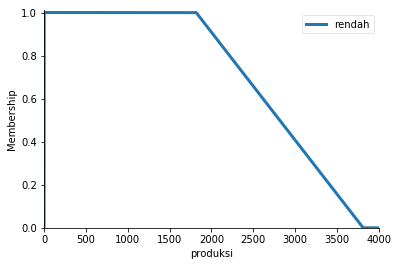

In [80]:
produksi = ctrl.Consequent(np.arange(0, 4000.5, 1), 'produksi')
produksi['rendah'] = fuzz.trapmf(produksi.universe, [0, 1, 1817, 3811])
produksi['rendah'].view()

plot diatas yang merupakan plot fungsi keanggotaan $\mu produksi\ rendah(x) $

#### - Produksi sedang
$$ \mu produksi\ sedang [z] = 
\begin{cases}
    0 & ; z \leq 1817\ atau\ z \geq 6454 \\
    \frac{(z-1817)}{3811-1817} & ;1817 \leq z \leq\ 3811 \\
    \frac{(6454-z)}{6454-3811} & ;3811 \leq z \leq\ 6454 \\
    1 & ; z = 3811
\end{cases}
$$


C:\Users\Win10\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


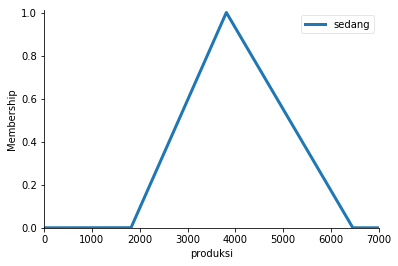

In [81]:
produksi = ctrl.Consequent(np.arange(0, 7000.5, 1), 'produksi')
produksi['sedang'] = fuzz.trimf(produksi.universe, [1817, 3811, 6454])
produksi['sedang'].view()

plot diatas yang merupakan plot fungsi keanggotaan $\mu produksi\ sedang(x) $

#### - Produksi tinggi
$$ \mu produksi\ tinggi [z] = 
\begin{cases}
    0 & ; z \leq 3811 \\
    \frac{(z-3811)}{6454-3811} & ;3811 \leq z \leq\ 6454 \\
    1 & ; z \geq 6454
\end{cases}
$$

C:\Users\Win10\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


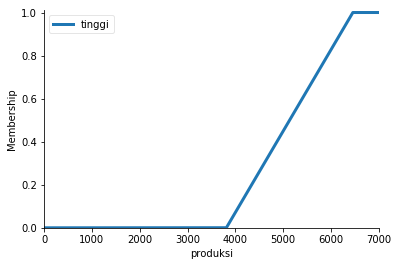

In [82]:
produksi = ctrl.Consequent(np.arange(0, 7000.5, 1), 'produksi')
produksi['tinggi'] = fuzz.trapmf(produksi.universe, [3811, 6454, 7000, 7000]) 
produksi['tinggi'].view()

plot diatas yang merupakan plot fungsi keanggotaan $\mu produksi\ tinggi(x) $

###### Plotting ke empat fungsi keanggotaan Produksi

C:\Users\Win10\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


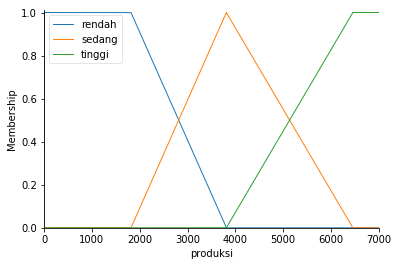

In [83]:
produksi = ctrl.Consequent(np.arange(0, 7000.5, 1), 'produksi')
produksi['rendah'] = fuzz.trapmf(produksi.universe, [0, 1, 1817, 3811])
produksi['sedang'] = fuzz.trimf(produksi.universe, [1817, 3811, 6454])
produksi['tinggi'] = fuzz.trapmf(produksi.universe, [3811, 6454, 7000, 7000]) 
produksi.view()

# 2. Rule Base

Pada tahap ini dibuatlag aturan-aturan atau rule base fuzzy yang dinyatakan dalam bentuk IF...THEN...

Berdasarkan jumlah fuzzifikasi variabel input dan variabel output yang masing-masing berjumlah 3, maka rule base yang dibuat  berjumlah 3^2 = 9 rule.

1. IF permintaan rendah AND persediaan banyak THEN produksi rendah 
2. IF permintaan sedang AND persediaan banyak THEN produksi rendah
3. IF permintaan tinggi AND persediaan banyak THEN produksi tinggi
4. IF permintaan rendah AND persediaan cukup THEN produksi rendah 
5. IF permintaan sedang AND persediaan cukup THEN produksi sedang
6. IF permintaan tinggi AND persediaan cukup THEN produksi tinggi
7. IF permintaan rendah AND persediaan kurang THEN produksi rendah
8. IF permintaan sedang AND persediaan kurang THEN produksi tinggi
9. IF permintaan tinggi AND persediaan kurang THEN produksi tinggi

In [84]:
rule1 = ctrl.Rule(permintaan['rendah'] & persediaan['banyak'], produksi['rendah'])
rule2 = ctrl.Rule(permintaan['sedang'] & persediaan['banyak'], produksi['rendah'])
rule3 = ctrl.Rule(permintaan['tinggi'] & persediaan['banyak'], produksi['tinggi'])
rule4 = ctrl.Rule(permintaan['rendah'] & persediaan['cukup'], produksi['rendah'])
rule5 = ctrl.Rule(permintaan['sedang'] & persediaan['cukup'], produksi['sedang'])
rule6 = ctrl.Rule(permintaan['tinggi'] & persediaan['cukup'], produksi['tinggi'])
rule7 = ctrl.Rule(permintaan['rendah'] & persediaan['kurang'], produksi['rendah'])
rule8 = ctrl.Rule(permintaan['sedang'] & persediaan['kurang'], produksi['tinggi'])
rule9 = ctrl.Rule(permintaan['tinggi'] & persediaan['kurang'], produksi['tinggi'])

# 3. Rule Evaluation

In [85]:
produk_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

# 4. Defuzzikikasi

Input dari proses penegasan adalah suatu himpunan fuzzy yang diperoleh dari komposisi aturan-aturan fuzzy, sedangkan output yang dihasilkan merupakan suatu bilangan real yang tegas. Dengan demikian jika diberikan suatu himpunan fuzzy dalam range tertentu, maka harus dapat diambil suatu nilai tegas tertentu sebagai output. 

In [86]:
produk1 = ctrl.ControlSystemSimulation(produk_ctrl)

Lalu kita masukkan nilai input
- nilai Permintaan = 2000 ton
- jumlah Persediaan = 1000 ton

In [97]:
produk1.input['permintaan'] = 2000
produk1.input['persediaan'] = 1000

Lalu perhitungan hasil defuzzifikasi 

In [98]:
produk1.compute()
print(produk1.output['produksi']) #untuk menampilkan hasil perhitungan

2108.929084022425


Jadi, hasil output yang didapatkan setelah dimasukkan nilai input adalah 2108.929084022425 ton

##### Plotting fungsi keanggotaan Permintaan setelah input dimasukkan 

C:\Users\Win10\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


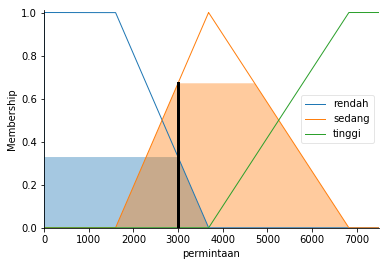

In [57]:
permintaan.view(produk1)

##### Plotting fungsi keanggotaan Persediaan setelah input dimasukkan 

C:\Users\Win10\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


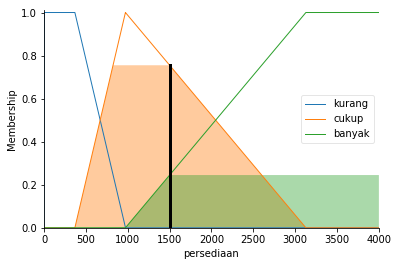

In [58]:
persediaan.view(produk1)

##### Plotting fungsi keanggotaan Permintaan setelah input dimasukkan 

C:\Users\Win10\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


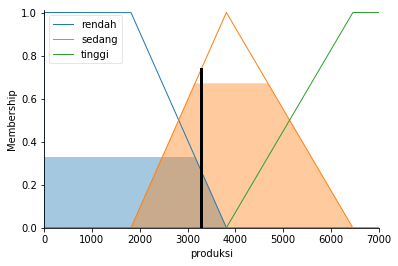

In [59]:
produksi.view(produk1)

#  $$ PERHITUNGAN\ MANUAL $$

Nilai input
- nilai Permintaan = 2000 ton
- jumlah Persediaan = 1000 ton
-----------------------------------------------------------
lalu masukkan nilai input ke masing-masing fungsi kenggotaan input.

## Fungsi keanggotaan Permintaan

- Permintaan rendah
======
$ \mu permintaan\ rendah [x] = 
\begin{cases}
    0 & ; x \geq 3685 \\
    \frac{(3685-x)}{3685-1601} & ;1601 \leq x \leq\ 3685 \checkmark \\
    1 & ; x \leq 1601
\end{cases}
$

Jadi, $ \mu permintaan\ rendah [x] = ( \frac{(3685-2000)}{3685-1601} = 0,8) $

- Permintaan sedang
===
$ \mu permintaan\ sedang [x] = 
\begin{cases}
    0 & ; x \leq 1601\ atau\ x \geq 6826 \\
    \frac{(x-1601)}{3685-1601} & ;1601 \leq x \leq\ 3685 \checkmark \\
    \frac{(6826-x)}{6826-3685} & ;3685 \leq x \leq\ 6826 \\
    1 & ; x = 3685
\end{cases}
$

Jadi, $ \mu permintaan\ sedang [x] = \frac{(2000-1601)}{3685-1601} = 0,19 $

- Permintaan tinggi
===
$ \mu permintaan\ tinggi [x] = 
\begin{cases}
    0 & ; x \leq 3685 \checkmark \\
    \frac{(x-3685)}{6826-3685} & ;3685 \leq x \leq\ 6826 \\
    1 & ; x \geq 6826
\end{cases}
$

Jadi, $ \mu permintaan\ tinggi [x] = 0 $

## Fungsi Keanggotaan Persediaan

- Persediaan kurang
====
$ \mu persediaan\ kurang [y] = 
\begin{cases}
    0 & ; y \geq 972 \\
    \frac{(972-y)}{972-368} & ;368 \leq y \leq\ 972 \\
    1 & ; y \geq 368 \checkmark
\end{cases}
$

Jadi, $ \mu persediaan\ kurang [y] = 1 $

- Persediaan cukup
==
$ \mu persediaan\ cukup [y] = 
\begin{cases}
    0 & ; y \leq 368\ atau\ y \geq 3127 \\
    \frac{(y-368)}{972-368} & ;368 \leq y \leq\ 972 \\
    \frac{(3127-y)}{3127-972} & ;972 \leq y \leq\ 3127 \checkmark\\
    1 & ; y = 972
\end{cases}
$

Jadi, $ \mu persediaan\ cukup [y] = \frac{(3127-1000)}{3127-972} = 0,98 $

- Persediaan banyak
==
$ \mu persediaan\ banyak [y] = 
\begin{cases}
    0 & ; y \leq 972 \\
    \frac{(y-972)}{3127-972} & ;972 \leq y \leq\ 3127 \checkmark \\
    1 & ; y \geq 3127
\end{cases}
$

Jadi, $ \mu persediaan\ banyak [y] = \frac{(1000-972)}{3127-972} = 0,03 $

Lalu kita cari nilai z untuk setiap aturan dengan menggunakan fungsi MIN karena menggunakan rule AND
_______

[1] IF permintaan rendah AND persediaan banyak THEN produksi rendah

$ \alpha(predikat_1) = \mu permintaan\ rendah \cap \mu persediaan\ banyak \\
\alpha(predikat_1)   = min (\mu permintaan\ rendah[2000], \mu persediaan\ banyak[1000])\\ 
\alpha(predikat_1) = min (0.8; 0,03) \\
\alpha(predikat_1) = 0.03 \\
$

Lalu lihat himpunan produksi rendah

$ \mu produksi\ rendah [z] = 
\begin{cases}
    0 & ; z \geq 3811 \\
    \frac{(3811-z)}{3811-1817} & ;1817 \leq z \leq\ 3811\
    1 & ; z \leq 1817
\end{cases}
$

uji nilai keanggotaan :
$ 
\frac{(3811-z)}{3811-1817} = 0,03\\
3811-z = 0,03 x 1994\\
-z = 59,82-3811\\
z= 3151,18\\
Z_1 = 3151,18
$ 
__________________________________
[2] IF permintaan sedang AND persediaan banyak THEN produksi rendah

$
\alpha(predikat_1) = \mu permintaan\ sedang \cap \mu persediaan\ banyak \\
\alpha(predikat_1)   = min (\mu permintaan\ rendah[2000], \mu persediaan\ banyak[1000]) \\
\alpha(predikat_1) = min (0.19; 0,03) \\
\alpha(predikat_1) = 0.03 \\
$

Lalu lihat himpunan produksi rendah

$ \mu produksi\ rendah [z] = 
\begin{cases}
    0 & ; z \geq 3811 \\
    \frac{(3811-z)}{3811-1817} & ;1817 \leq z \leq\ 3811 \\
    1 & ; z \leq 1817
\end{cases}
$

uji nilai keanggotaan :
$ 
\frac{(3811-z)}{3811-1817} = 0,03\\
3811-z = 0,03 x 1994\\
-z = 59,82-3811\\
z= 3151,18\\
Z_2 = 3151,18
$ 
__________________________________
[3]. IF permintaan tinggi AND persediaan banyak THEN produksi tinggi

$
\alpha(predikat_1) = \mu permintaan\ tinggi \cap \mu persediaan\ banyak \\ 
\alpha(predikat_1)   = min (\mu permintaan\ tinggi[2000], \mu persediaan\ banyak[1000]) \\
\alpha(predikat_1) = min (0; 0,03) \\
\alpha(predikat_1) = 0 \\
$

Lalu lihat himpunan produksi tinggi :

$ \mu produksi\ tinggi [z] = 
\begin{cases}
    0 & ; z \leq 3811 \\
    \frac{(z-3811)}{6454-3811} & ;3811 \leq z \leq\ 6454 \\
    1 & ; z \geq 6454
\end{cases}
$

$Z_3 = 0$ 
_____________
[4] IF permintaan rendah AND persediaan cukup THEN produksi rendah

$
\alpha(predikat_1) = \mu permintaan\ rendah \cap \mu persediaan\ cukup\\ 
\alpha(predikat_1)   = min (\mu permintaan\ rendah[2000], \mu persediaan\ cukup[1000]) \\
\alpha(predikat_1) = min (0.8; 0,98) \\
\alpha(predikat_1) = 0.8 \\
$

lalu lihat himpunan produksi rendah

$ \mu produksi\ rendah [z] = 
\begin{cases}
    0 & ; z \geq 3811 \\
    \frac{(3811-z)}{3811-1817} & ;1817 \leq z \leq\ 3811 \\
    1 & ; z \leq 1817
\end{cases}
$

uji nilai keanggotaan :
$ 
\frac{(3811-z)}{3811-1817} = 0,8\\
3811-z = 0,8 x 1994\\
-z = 15995,2-3811\\
z= 2215,8\\
$

$Z_4 = 2215,8$
___________________________
[5] IF permintaan sedang AND persediaan cukup THEN produksi sedang

$
\alpha(predikat_1) = \mu permintaan\ sedang \cap \mu persediaan\ cukup\\ 
\alpha(predikat_1)   = min (\mu permintaan\ sedang[2000], \mu persediaan\ cukup[1000])\\ 
\alpha(predikat_1) = min (0,19; 0,98) \\
\alpha(predikat_1) = 0.19 
$

uji nilai keanggotaan, ada 2 himpunan :

$ \mu produksi\ sedang [z] = 
\begin{cases}
    0 & ; z \leq 1817\ atau\ z \geq 6454 \\
    \frac{(z-1817)}{3811-1817} & ;1817 \leq z \leq\ 3811 \checkmark \\
    \frac{(6454-z)}{6454-3811} & ;3811 \leq z \leq\ 6454 \checkmark \\
    1 & ; z = 3811
\end{cases}
$

$
1)\ \frac{(z-1817)}{3811-1817} = 0.19 \\
z-1817=0,19 x 1994 \\
z= 378,86+1817\\
z= 2195,86\\
$

$
2)\ \frac{(6454-z)}{6454-3811} = 0,19 \\
6454-z = 0,19 x 2643\\
-z = 502,17 + 6454\\
z = 6959,17
$

nilai Z yang diambil adalah nilai yang terkecil, maka $Z_5 = 6959,17
$
___________________
[6] IF permintaan tinggi AND persediaan cukup THEN produksi tinggi

$ 
\alpha(predikat_1) = \mu permintaan\ tinggi \cap \mu persediaan\ cukup \\
\alpha(predikat_1)   = min (\mu permintaan\ tinggi[2000], \mu persediaan\ cukup[1000])\\ 
\alpha(predikat_1) = min (0; 0,98) \\ 
\alpha(predikat_1) = 0
$

Lalu lihat himpunan produksi tinggi :

$ \mu produksi\ tinggi [z] = 
\begin{cases}
    0 & ; z \leq 3811 \\
    \frac{(z-3811)}{6454-3811} & ;3811 \leq z \leq\ 6454 \\
    1 & ; z \geq 6454
\end{cases}
$

Jadi $Z_6=0$
______
[7] IF permintaan rendah AND persediaan kurang THEN produksi rendah

$ 
\alpha(predikat_1) = \mu permintaan\ rendah \cap \mu persediaan\ kurang \\
\alpha(predikat_1)   = min (\mu permintaan\ rendah[2000], \mu persediaan\ kurang[1000])\\ 
\alpha(predikat_1) = min (0,8; 1) \\ 
\alpha(predikat_1) = 0,8
$

$ \mu produksi\ rendah [z] = 
\begin{cases}
    0 & ; z \geq 3811 \\
    \frac{(3811-z)}{3811-1817} & ;1817 \leq z \leq\ 3811 \\
    1 & ; z \leq 1817
\end{cases}
$

uji nilai keanggotaan :
$ 
\frac{(3811-z)}{3811-1817} = 0,8\\
3811-z = 0,8 x 1994\\
-z = 15995,2-3811\\
z= 2215,8\\
$

$Z_7 = 2215,8$
_______________
[8] IF permintaan sedang AND persediaan kurang THEN produksi tinggi

$ 
\alpha(predikat_1) = \mu permintaan\ sedang \cap \mu persediaan\ kurang \\
\alpha(predikat_1)   = min (\mu permintaan\ sedang[2000], \mu persediaan\ kurang[1000])\\ 
\alpha(predikat_1) = min (0,19; 1) \\ 
\alpha(predikat_1) = 0,19
$

Lalu lihat himpunan produksi tinggi :

$ \mu produksi\ tinggi [z] = 
\begin{cases}
    0 & ; z \leq 3811 \\
    \frac{(z-3811)}{6454-3811} & ;3811 \leq z \leq\ 6454 \\
    1 & ; z \geq 6454
\end{cases}
$

uji nilai keanggotaan :
$ 
\frac{(z-3811)}{6454-3811} = 0,19\\
z-3811 = 0,19 x 2643\\
z = 502,19+3811\\
z= 4313,19\\
$

$Z_8 = 4313,19$
_______________
[9]IF permintaan tinggi AND persediaan kurang THEN produksi tinggi

$ 
\alpha(predikat_1) = \mu permintaan\ tinggi \cap \mu persediaan\ kurang \\
\alpha(predikat_1)   = min (\mu permintaan\ tinggi[2000], \mu persediaan\ kurang[1000])\\ 
\alpha(predikat_1) = min (0; 1) \\ 
\alpha(predikat_1) = 0
$

Lalu lihat himpunan produksi tinggi :

$ \mu produksi\ tinggi [z] = 
\begin{cases}
    0 & ; z \leq 3811 \\
    \frac{(z-3811)}{6454-3811} & ;3811 \leq z \leq\ 6454 \\
    1 & ; z \geq 6454
\end{cases}
$

$Z_9 = 0$
____
lalu kita dapat menghitung nilai produksi(z) :

$
Z = \frac{(\alpha predikat_1 \times Z_1 )+ (\alpha predikat_2 \times Z_2 )+ (\alpha predikat_3 \times Z_3) + (\alpha predikat_4 \times Z_4 )+ (\alpha predikat_5 \times Z_5 )+ (\alpha predikat_6 \times Z_6 )+( \alpha predikat_7 \times Z_7) + (\alpha predikat_8 \times Z_8 )+ (\alpha predikat_9 \times Z_9)}{\alpha predikat_1 + \alpha predikat_2 + \alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 + \alpha predikat_7 + \alpha predikat_8 + \alpha predikat_9 }
$

$Z = \frac{(0.03 \times 3751.18) + (0.03 \times 3751.18) + 0 + (0.8 \times 2215.8) + (0.19 \times 2195.68 + 0 + (0.8 \times 2215.8) + (0.19 \times 4313.19) + 0 }{0.03 + 0.03 + 0 + 0.8 + 0.19 + 0 + 0.8 + 0.19 + 0}\\
Z = \frac{5007.0361}{2.04} \\
Z = 2454.429460784314 
$

Hasil output yang dikeluarkan menggunakan code python sebesar 2108.929084022425 ton sedangkan perhitungan manual sebesar 2454.429460784314 . 
Terdapat perbedaan sebesar 345.50037676188913 ton dan nilai errornya sebesar 4,9%

========================================================================================================================
Referensi jurnal yang digunakan adalah : 

Judul : APLIKASI LOGIKA FUZZY DALAM MENGOPTIMALKAN PRODUKSI MINYAK KELAPA SAWIT DI PT. WARU KALTIM PLANTATION MENGGUNAKAN METODE MAMDANI

Penulis : Akbar Rizky Wardani,dkk 